In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [74]:
#load the modules for linear regression
from sklearn.linear_model import LinearRegression

In [94]:
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
#Predict a car price using highway-mpg
X = df[['highway-mpg']]
Y = df['price']

In [96]:
#Git linear regression
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
#Output a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [98]:
#Intercept (a)
lm.intercept_

38423.305858157386

In [99]:
#Slop (b)
lm.coef_

array([-821.73337832])

In [100]:
#linear regression object
lm1 = LinearRegression()
lm1


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
#Predict a car price using engine-size
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
#Intercept
lm1.intercept_

array([-7963.33890628])

In [103]:
#Slope
lm1.coef_

array([[166.86001569]])

In [ ]:
# Yhat = a + bX
# price = -7963.33+166.86*'engine-size'

In [123]:
#-----multiple regression------
#Creating a model Z using these variables 
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [124]:
#Create the linear regression object
lm2 = LinearRegression()
lm2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
lm2.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
#Intercept
lm2.intercept_

-15806.624626329198

In [127]:
#Slope
lm2.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [128]:
#Model Visualization
import seaborn as sns
%matplotlib inline

(0, 56059.97290321859)

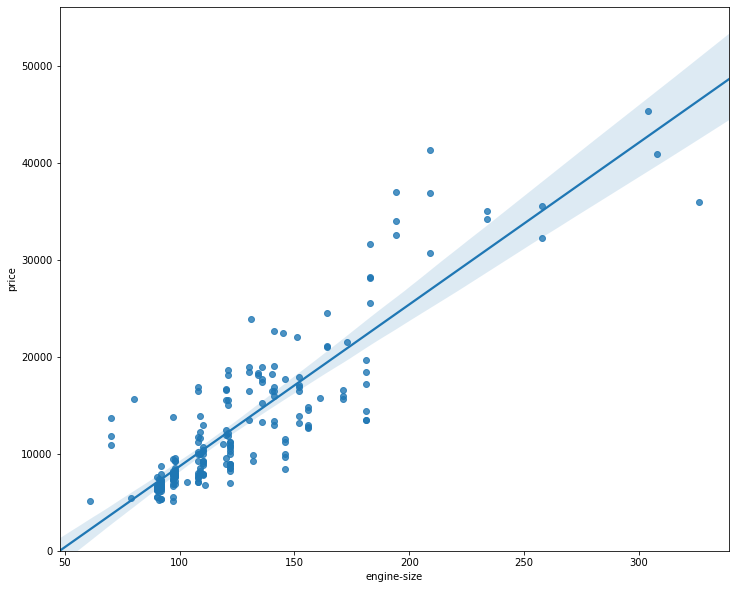

In [130]:
width = 12
height = 10
#We can see that engine-size and price are correlated well and there will be possible to predict a price
plt.figure(figsize=(width, height))
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

(0, 47422.919330307624)

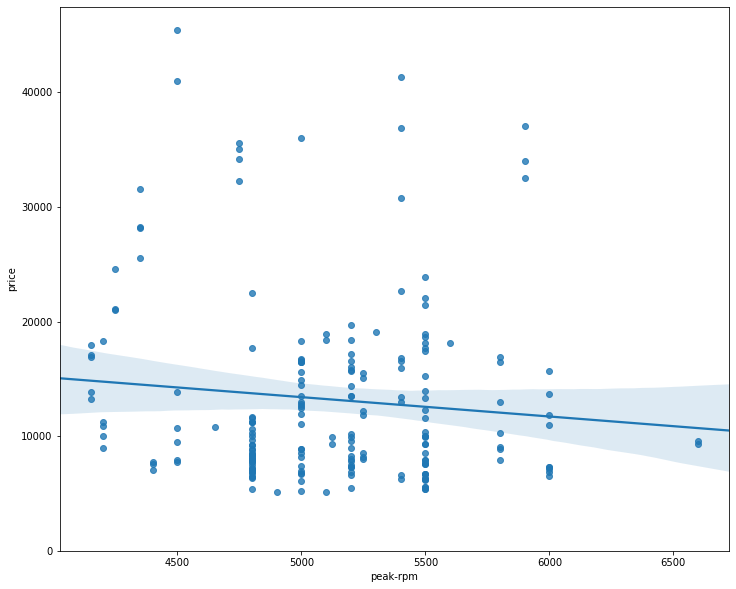

In [131]:
#We can see that peak-rpm and price are not correlated well and there will be difficult to predict a price
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [132]:
#Residual Plot. 
#If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data

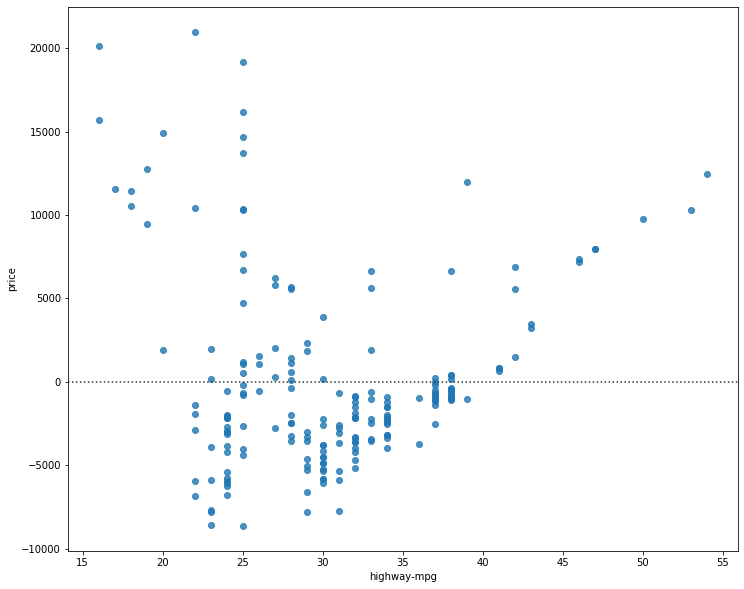

In [133]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [134]:
#We can see from this residual plot that the residuals are not randomly spread around the x-axis.

In [135]:
#Multiple Linear Regression
Y_hat = lm.predict(Z)

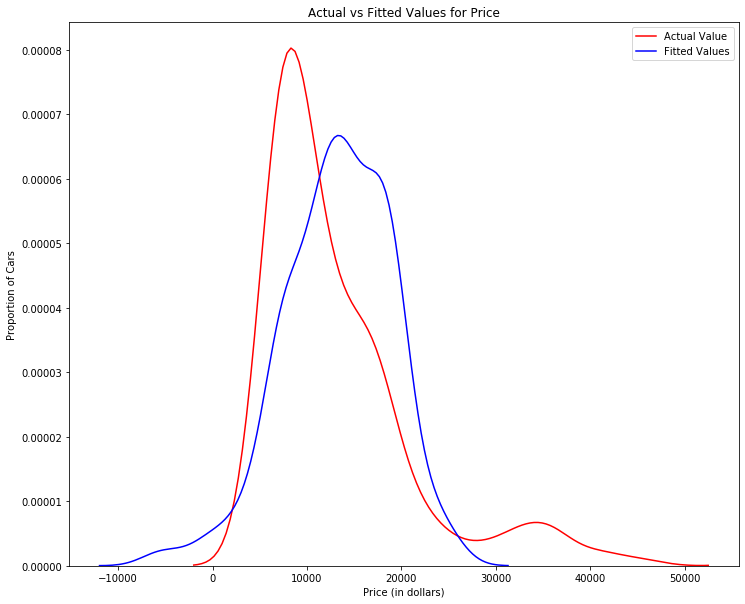

In [136]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [137]:
#Part 3: Polynomial Regression and Pipelines

In [138]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [139]:
x = df['highway-mpg']
y = df['price']

In [140]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


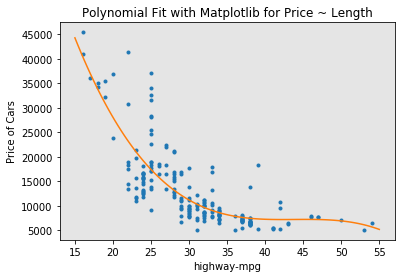

In [141]:
PlotPolly(p, x, y, 'highway-mpg')

In [142]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])